In [18]:
# Importing Libraries

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.tree import plot_tree
from pandas_profiling import ProfileReport

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.tree import DecisionTreeClassifier

In [19]:
# Loading data and displaying the first 5 rows

df = pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [20]:
# Checking the number of rows, data types and the absence of missing values

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [21]:
# This is a fairly simple sample dataset that does not require deep research, so I will use the AutoEDA tool - 
# Pandas Profile Report from pandas_profiling libruary

profile = ProfileReport(df, title="Pandas Profiling Report")
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [22]:
# Checking the number of unique feature values

df.nunique()

Id               150
SepalLengthCm     35
SepalWidthCm      23
PetalLengthCm     43
PetalWidthCm      22
Species            3
dtype: int64

In [23]:
# Since all values in the Id column are unique, it has no value to the model. Delete it

df = df.drop(columns='Id')

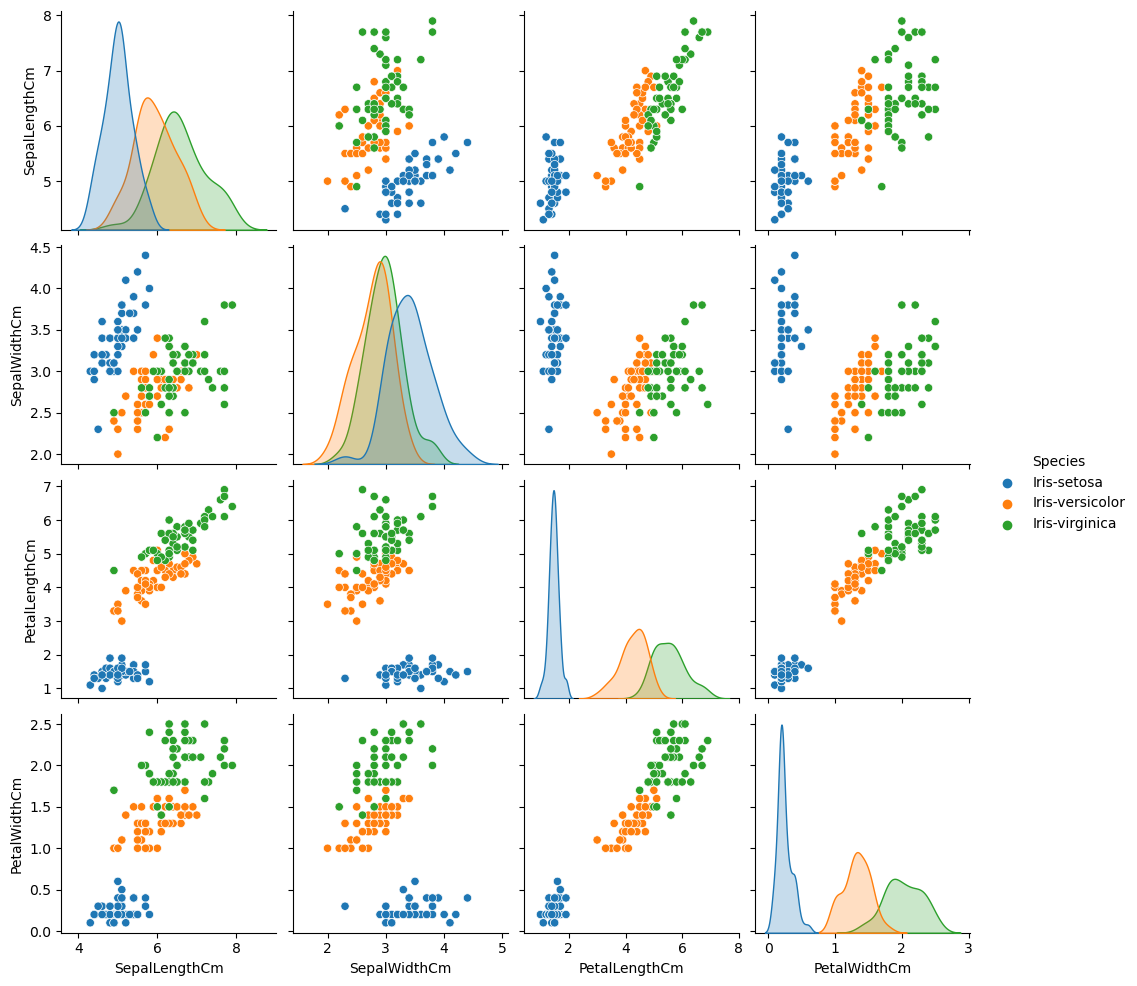

In [24]:
# Create a grid of pairplot for features

sns.pairplot(df,hue = 'Species')

In [25]:
# Initialization of features and target variable

x = df.drop(['Species'], axis=1)
y = df['Species']

train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.3, random_state=42)

In [26]:
# Create DecisionTreeClassifier Model

tree_model = DecisionTreeClassifier(random_state=1)

In [27]:
# Calculate the mean value of the metric and standard deviation with 5-fold cross-validation
# Since the target classes are balanced, you can use the 'accuracy' metric

cv_score = cross_val_score(tree_model, x, y, cv=5, scoring='accuracy')
print(f'Mean accuracy score with 5-folds cross-validate for {(str(tree_model).split("(")[0])} model:\
                            \nAccuracy={round(cv_score.mean(), 2)}, std={round(cv_score.std(), 3)}\n')

Mean accuracy score with 5-folds cross-validate for DecisionTreeClassifier model:                            
Accuracy=0.97, std=0.037



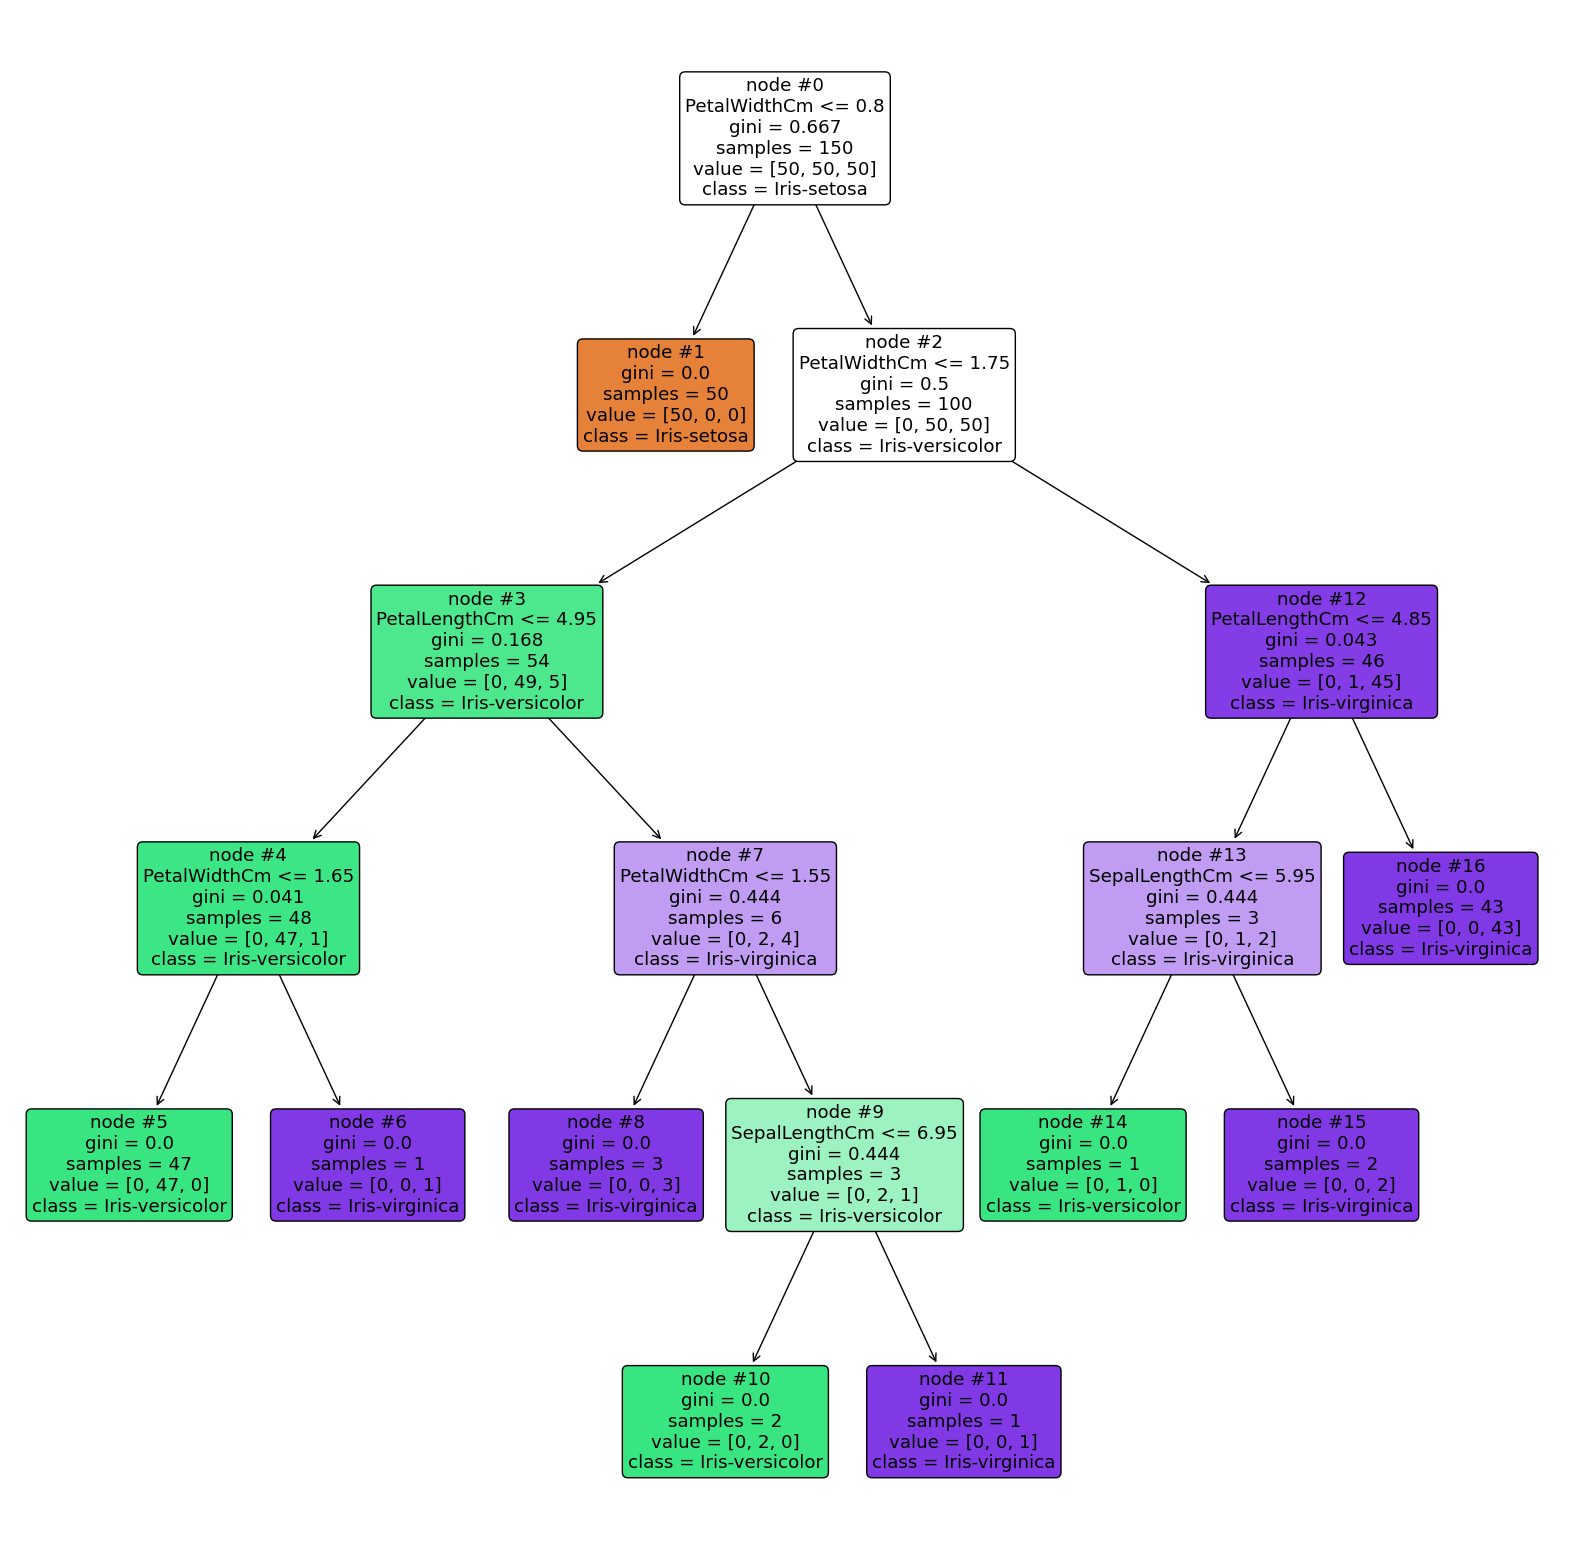

In [28]:
# Train the model with all the data and visualize the decision tree using the tree.plot_tree of the sklearn library

tree_model.fit(x, y)

fig = plt.figure(figsize=(20, 20))
tree_img = plot_tree(tree_model, feature_names = x.columns.tolist(), class_names = df['Species'].unique().tolist(), 
                     filled = True, node_ids=True, rounded=True)